

# Project: Investigate a Dataset (No-show Appointments Dataset) 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#wrangling">Getting to know the data</a></li>
<li><a href="#wrangling">Data cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

## For the dataset we have  serveral questions can be asked : 

How many records are in this dataset?

How can we validate this dataset?

Is this dataset clean?

Does Age affect the attendace rate?

Does Gender affect the attendace rate?

Does Scholarship affect the attendace rate?

Does Receiving an SMS affect the attendace rate?

Does Living close by affect the attendace rate?

And many more questions will come along the way..



In [1]:
## In this Part I am importing all packages that I require to investigate the selected dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In this section I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
# Load my data and printing out a few lines, and performing operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Getting to know the data  
Investigating how many rows and columns we have.

Observations, and explination comments are always under the output.

In [3]:
#Cheking for the metric for data sheet
df.shape

(110527, 14)

We have 110527 Rows, And 14 Columns

Checking for duplicates

In [4]:
df.duplicated().sum()

0

No duplicates of the same row

In [5]:
df['PatientId'].nunique()

62299

In this step, we are checking how many lines are unique for  patients or are there more than one appointment for the same patient?  out of the entire 110527 rows, and it's only 62299 unique patients out of the total

In [6]:
df['PatientId'].duplicated().sum()

48228

Here we are checking how many duplicate PatientIDs across all the sheet which is just a step for verfication because OUT 62299+48228 = 110527, so it's cross validated and correct.

In [7]:
df.duplicated(['PatientId','No-show']).sum()

38710

Here we are identifying the patients who have duplicate appopintments regardless of the ' Show or no show ' status.

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Getting  info about the sheet to validate across columns,

For example : -1 Minimum age is not possible, and so on..

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here we are checking whether we have any missing values from any column/raw, and it seems to be all filled, however for validation as from the above commands, it looks like it does need cleaning...

In [10]:
Invalid=df.query('Age=="-1"')
Invalid

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


As we found out from previous observation, we know -1 was input as an age, so in this command we search for all values within the date for a -1 in age, and it turns out to be Row 99832.

## Data cleaning 

In this section we will start cleaning the dataset whether it's from Attributes, Column naming, etc..

In [11]:
df.rename(columns={'Hipertension' : 'Hypertension'}, inplace = True)
df.rename(columns={'No-show' : 'No_Show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here we Are changing Column naming and verifying whether it changed or not

In [12]:
df.drop(index=99832,inplace=True)

Here we are dropping the value -1 Age from the schema, to get rid off the unwanted or Invalid input.

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we validate whether it's removed or not, and yes it was removed 

In [14]:
df.drop_duplicates(['PatientId','No_Show'],inplace=True)
df.shape

(71816, 14)

Here we are removing the duplicate Rows from the schema with the Status No Show.

In [15]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here I'm removing all irrealevant columns related to my data analysis to further assist in the analysis phase.

## Data cleaning conclusion.

As a conclusion we showed how the data set had many duplicates, and some validation errors. 
And as a result of that, we have cleaned the data from the duplicates, validation errors, and prepared the Dataset by removing unneseccary attributes to begin the Analysis phase!

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 


COMMENTS AND OBSERVATIONS ARE AFTER THE COMMAND AS PERVIOUSELY ILLUSTRATED IN THE CLEANING PHASE

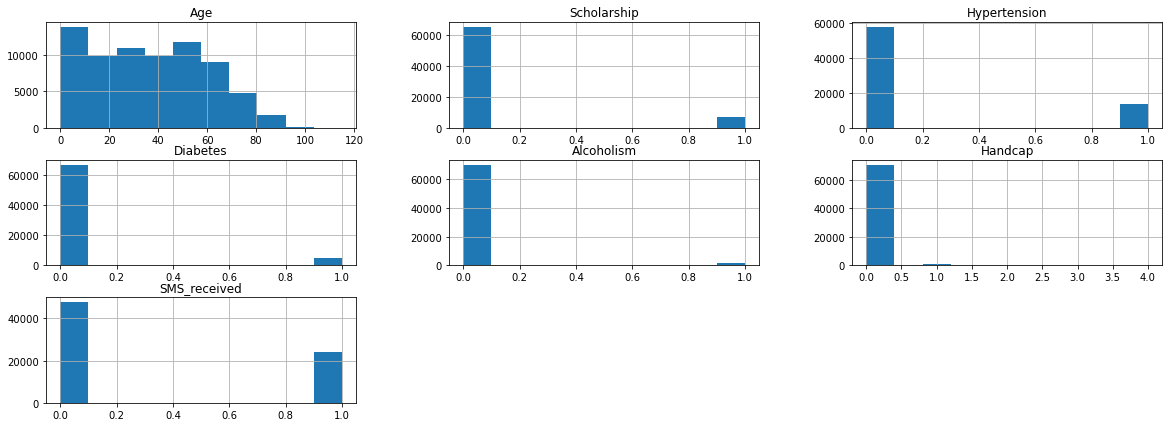

In [16]:
df.hist(figsize=(20,7));

Here I'm just visualizing the data to see Numbers, and easy of reading.

As an observation, the number of people not receiving SMS is unexpected

In [17]:
PShow=df.No_Show=='No'
PNoShow=df.No_Show=='Yes'
df[PShow].count(),df[PNoShow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_Show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_Show          17663
 dtype: int64)

In this section we are counting the amount of patients that showed up to the appointment, and the patients that didn't show up to the appointment.

And as an observation roughly 30% of the appointments DIDN'T show up :(

## Deep Analysis of why Did the patients did not show up

Here We will anaylize on why did the Patients not attend the appointment, based on some techiniques.

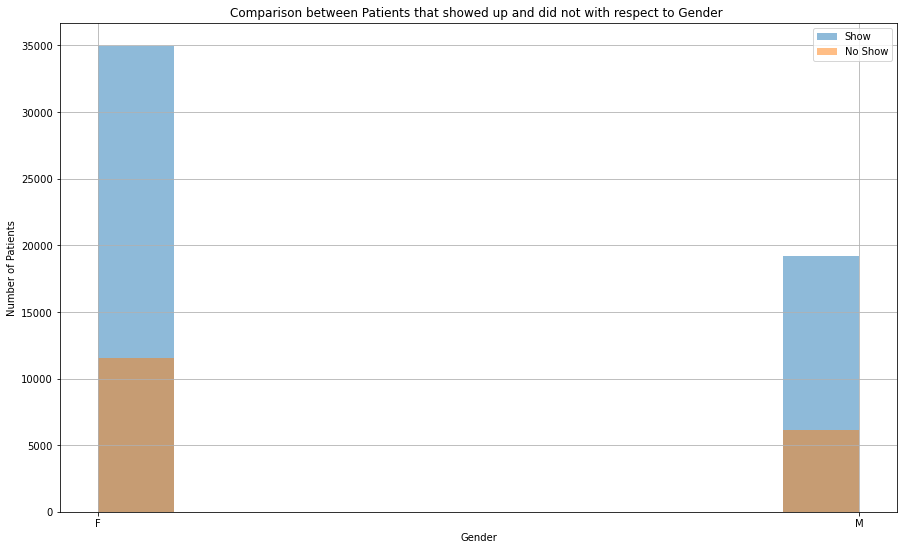

In [18]:
#Doing an equation to visualize Attendance By Gender

plt.figure(figsize=[15, 9])
df.Gender[PShow].hist(alpha = 0.5, label = 'Show')
df.Gender[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to Gender ')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');
   

Based on the Plot above the correlation of Gender is not relevant to the percentage of show and not show. Lets try a different variable.

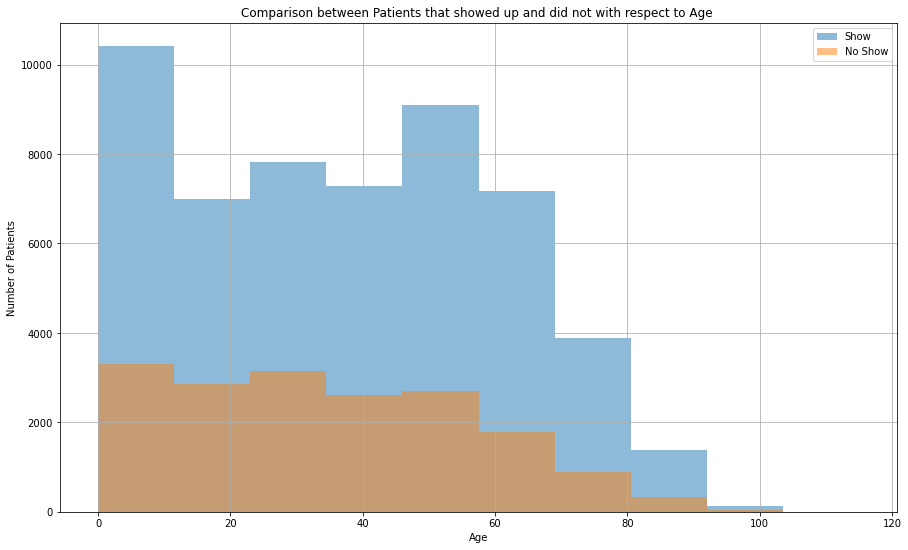

In [19]:
#Doing an equation to visualize Attendance By Age

plt.figure(figsize=[15, 9])
df.Age[PShow].hist(alpha = 0.5, label = 'Show')
df.Age[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to Age ')
plt.xlabel('Age')
plt.ylabel('Number of Patients');
   

In this section we see that the age group of 0 to 10 Are the highest Show rate of all ages.
Followed by 10-70. But as the age gets above 70 We have a major increase in noshow percentage. 

Lets try a different variable to get more info.

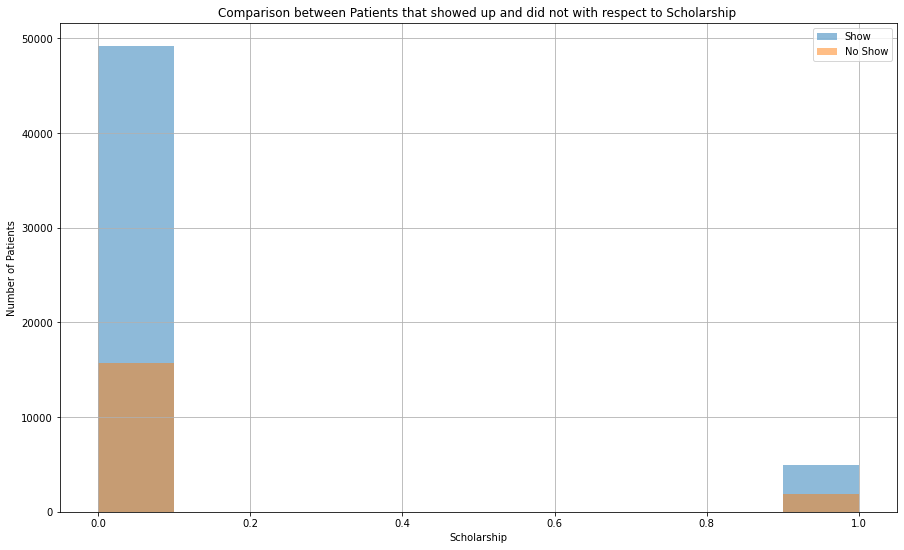

In [20]:
#Doing an equation to visualize Attendance By Scholarship

plt.figure(figsize=[15, 9])
df.Scholarship[PShow].hist(alpha = 0.5, label = 'Show')
df.Scholarship[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to Scholarship ')
plt.xlabel('Scholarship')
plt.ylabel('Number of Patients');
   

No observation when it comes to the patient being enrolled in the Brasillian welfare program. 

Lets try a differet metric.

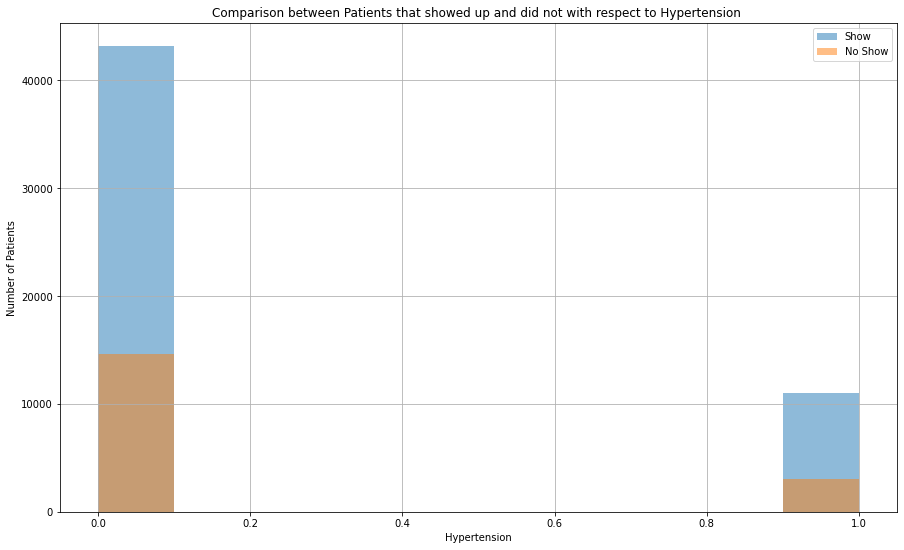

In [21]:
#Doing an equation to visualize Attendance By Hypertension

plt.figure(figsize=[15, 9])
df.Hypertension[PShow].hist(alpha = 0.5, label = 'Show')
df.Hypertension[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to Hypertension ')
plt.xlabel('Hypertension')
plt.ylabel('Number of Patients');
   

Same remark as Scholarship. Try again.. 

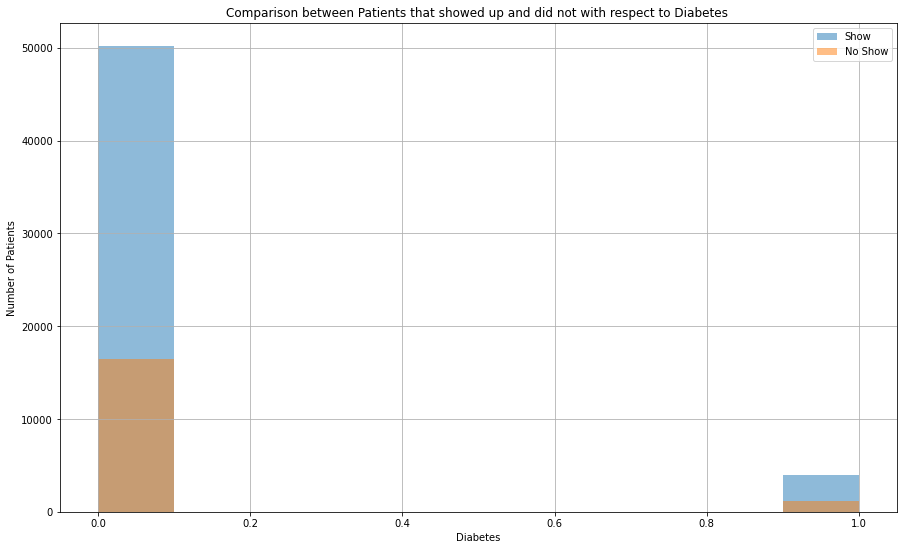

In [22]:
#Doing an equation to visualize Attendance By Diabetes

plt.figure(figsize=[15, 9])
df.Diabetes[PShow].hist(alpha = 0.5, label = 'Show')
df.Diabetes[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to Diabetes ')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients');
   

Same remark as above, try again..

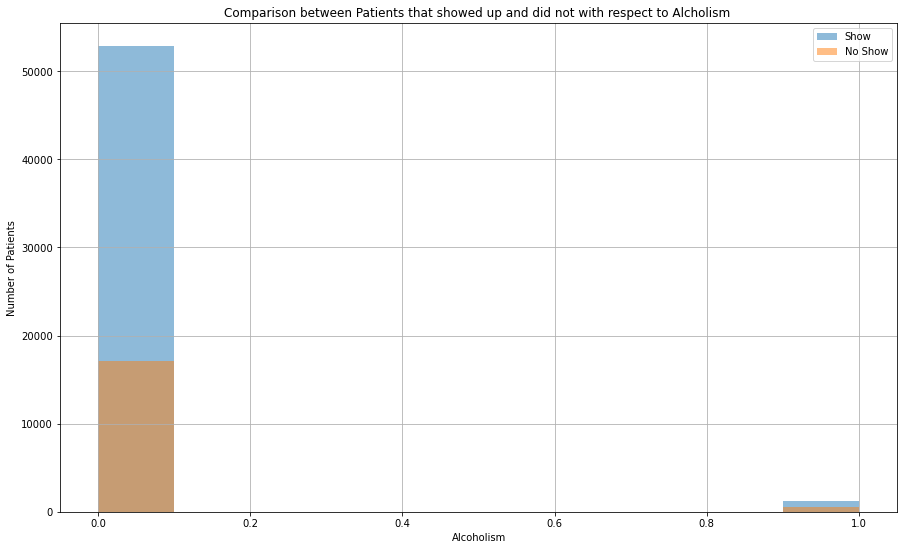

In [23]:
#Doing an equation to visualize Attendance By Alcholism

plt.figure(figsize=[15, 9])
df.Alcoholism[PShow].hist(alpha = 0.5, label = 'Show')
df.Alcoholism[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to Alcholism ')
plt.xlabel('Alcoholism')
plt.ylabel('Number of Patients');
   

Same remark no correlation, try again... :\

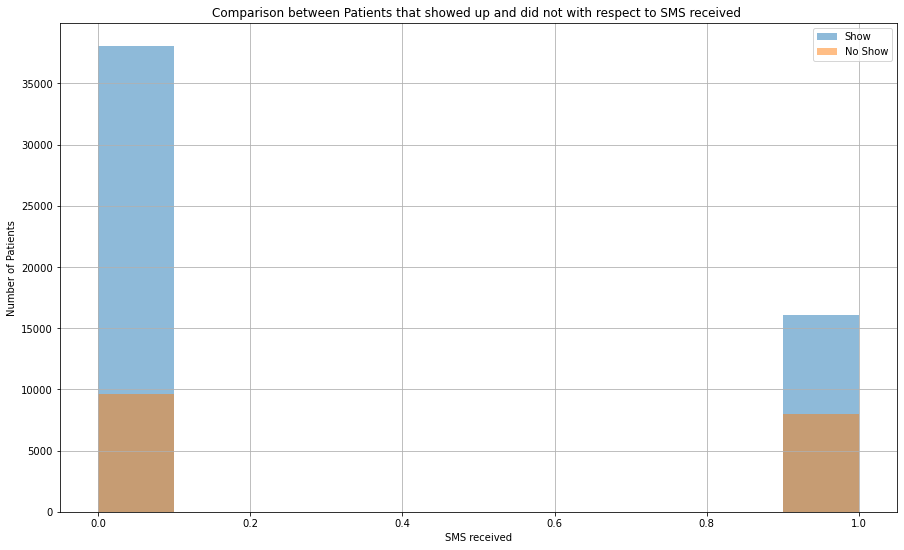

In [24]:
#Doing an equation to visualize Attendance By SMS received 

plt.figure(figsize=[15, 9])
df.SMS_received[PShow].hist(alpha = 0.5, label = 'Show')
df.SMS_received[PNoShow].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.title('Comparison between Patients that showed up and did not with respect to SMS received ')
plt.xlabel('SMS received')
plt.ylabel('Number of Patients');
   

This makes no sense since more people went without SMS received...

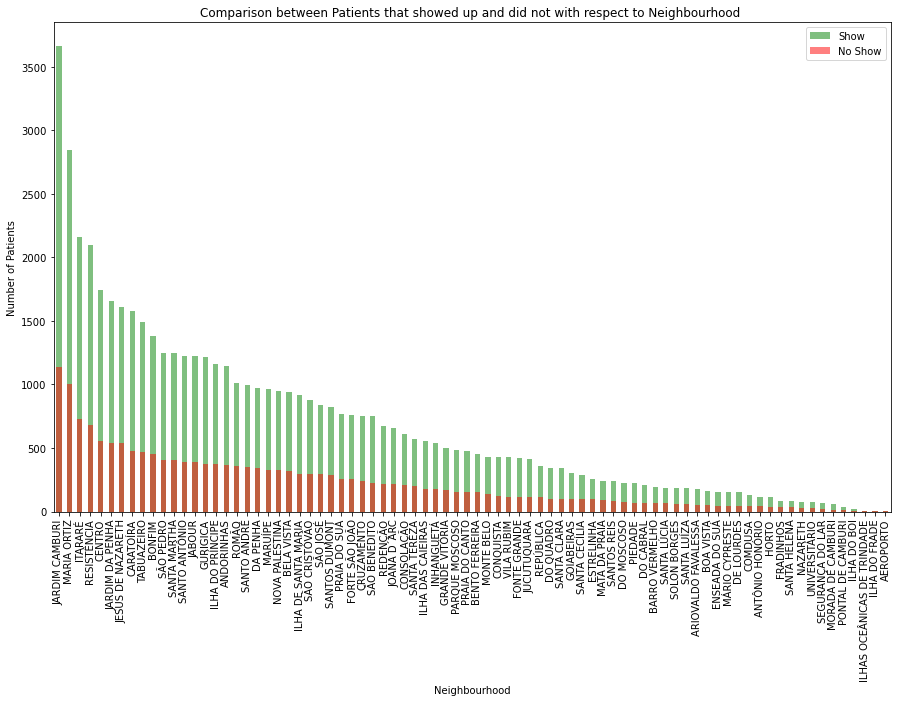

In [27]:
#Doing an equation to visualize Attendance By Neighborhood
def Neighborhood():  
    plt.figure(figsize=[15, 9]);
    df.Neighbourhood[PShow].value_counts().plot (kind='bar', alpha=0.5, color='green', label='Show');
    df.Neighbourhood[PNoShow].value_counts().plot (kind='bar', alpha=0.5, color='red', label='No Show');
    plt.legend();
    plt.title('Comparison between Patients that showed up and did not with respect to Neighbourhood ')
    plt.xlabel('Neighbourhood');
    plt.ylabel('Number of Patients');

Neighborhood() 
   

I had to change the technique used here due to the field having multiple values, however it seems that the colleration is strong here with the neighbourhood.

<a id='conclusions'></a>
## Conclusions

So as a Conclusion to my analysis on this dataset, the correlation are as follows :

- The age ranges I have stated above are very strongly correlated to the attendace ratio, as we have seen the older the group gets the less the attendance gets.

- The neighbourhood has a strong correlation to the attendance rate, it seems like the closer is is the higher the attendance rate is.

- And lastly even though it doesn't make any sense, it seems like the ratio of people who didn't recieve texts showed up more.. 

## Limitations

Moreover, from the deep analysis illustrated above, the other criteria didn't have a strong correlation to the attendance ratio.


## Resources  

https://pythonprogramming.net/bar-chart-histogram-matplotlib-tutorial/
